In [1]:
###capstone BUSINESS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from time import time
import dill

In [3]:

with open('df_business_clean.pkd', 'rb') as f:
    df_business = dill.load(f)

In [4]:
df_business.describe()

,Price
count,121975.000000
mean,927.367212
std,480.077623
min,169.000000
25%,579.000000
50%,859.990000
75%,1179.000000
max,25000.000000


In [5]:
df_business.head()

,ASIN,Date,Price
0,B00S98NXKY,2015/06/19,1186.99
1,B00S98NXKY,2015/07/14,1169.99
2,B00S98NXKY,2015/08/12,1198.99
3,B00S98NXKY,2015/08/22,1149.99
4,B00S98NXKY,2015/09/03,1199.99


In [6]:
df_business.tail()

,ASIN,Date,Price
132603,B0BJCKZFZ3,2022/11/23,516.99
132604,B0BJCKZFZ3,2022/11/25,516.48
132605,B0BJCKZFZ3,2022/11/25,522.00
132606,B0BJCKZFZ3,2022/11/28,527.99
132607,B0BJCKZFZ3,2022/11/29,524.99


In [7]:
df_business.shape

(132608, 3)

In [8]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132608 entries, 0 to 132607
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ASIN    132608 non-null  object 
 1   Date    132608 non-null  object 
 2   Price   121975 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.0+ MB


In [9]:
df_business.isnull().sum()

ASIN         0
Date         0
Price    10633
dtype: int64

In [10]:
df_business.dropna(inplace=True)

In [11]:
df_business

,ASIN,Date,Price
0,B00S98NXKY,2015/06/19,1186.99
1,B00S98NXKY,2015/07/14,1169.99
2,B00S98NXKY,2015/08/12,1198.99
3,B00S98NXKY,2015/08/22,1149.99
4,B00S98NXKY,2015/09/03,1199.99
...,...,...,...
132603,B0BJCKZFZ3,2022/11/23,516.99
132604,B0BJCKZFZ3,2022/11/25,516.48
132605,B0BJCKZFZ3,2022/11/25,522.00
132606,B0BJCKZFZ3,2022/11/28,527.99


In [12]:
df_business.reset_index(inplace=True)

In [13]:
df_business

,index,ASIN,Date,Price
0,0,B00S98NXKY,2015/06/19,1186.99
1,1,B00S98NXKY,2015/07/14,1169.99
2,2,B00S98NXKY,2015/08/12,1198.99
3,3,B00S98NXKY,2015/08/22,1149.99
4,4,B00S98NXKY,2015/09/03,1199.99
...,...,...,...,...
121970,132603,B0BJCKZFZ3,2022/11/23,516.99
121971,132604,B0BJCKZFZ3,2022/11/25,516.48
121972,132605,B0BJCKZFZ3,2022/11/25,522.00
121973,132606,B0BJCKZFZ3,2022/11/28,527.99


In [14]:
len(pd.unique(df_business['ASIN']))

2809

In [15]:
ASIN = df_business['ASIN'].unique()

In [16]:
ASIN

array(['B00S98NXKY', 'B00WJTC13O', 'B00ZZ94CS2', ..., 'B0BHY2HS37',
       'B0BJCKVYTZ', 'B0BJCKZFZ3'], dtype=object)

In [17]:
df_business.groupby(['ASIN']).agg({'Price': ['count', 'mean', 'median', 'std', 'min', 'max'] })

Price                                                     
           count         mean    median         std      min      max
ASIN                                                                 
B00S98NXKY    54  1044.978704  1149.970  163.902104   495.00  1199.99
B00WJTC13O   166   287.465843   284.835   44.381700   187.05   378.25
B00ZZ94CS2    20  1257.960000  1299.950  130.192733   999.95  1399.95
B0106GYM1A    56   943.647679   944.000  114.589320   719.00  1129.00
B0147GPUUC    30  1133.829000  1159.925   74.622077   899.00  1249.99
...          ...          ...       ...         ...      ...      ...
B0BHX8HYCJ    14   473.145714   472.915   61.217291   397.00   604.99
B0BHY1PJ5Z    12  2374.411667  2299.495   97.021950  2298.00  2499.99
B0BHY2HS37    13  2197.917692  2248.990   88.730722  2082.00  2299.99
B0BJCKVYTZ    11   557.261818   557.000   11.287637   544.99   584.99
B0BJCKZFZ3    13   525.623846   517.990   15.193558   511.99   562.99

[2809 rows x 6 columns]

In [18]:
df_abstract = df_business.groupby(['ASIN']).agg({'Price': ['count', 'mean', 'median', 'std', 'min', 'max'] })

In [19]:
df_business['Date'] = pd.to_datetime(df_business['Date'])

In [20]:
df_business.drop('index', axis=1, inplace=True)

In [21]:
df_business

,ASIN,Date,Price
0,B00S98NXKY,2015-06-19,1186.99
1,B00S98NXKY,2015-07-14,1169.99
2,B00S98NXKY,2015-08-12,1198.99
3,B00S98NXKY,2015-08-22,1149.99
4,B00S98NXKY,2015-09-03,1199.99
...,...,...,...
121970,B0BJCKZFZ3,2022-11-23,516.99
121971,B0BJCKZFZ3,2022-11-25,516.48
121972,B0BJCKZFZ3,2022-11-25,522.00
121973,B0BJCKZFZ3,2022-11-28,527.99


In [22]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121975 entries, 0 to 121974
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ASIN    121975 non-null  object        
 1   Date    121975 non-null  datetime64[ns]
 2   Price   121975 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.8+ MB


In [23]:
df_business.groupby(['ASIN']).agg({'Date': ['count',  'min', 'max'] })

Date                      
           count        min        max
ASIN                                  
B00S98NXKY    54 2015-06-19 2021-12-10
B00WJTC13O   166 2020-08-01 2022-11-14
B00ZZ94CS2    20 2015-08-26 2022-04-04
B0106GYM1A    56 2019-12-19 2022-11-16
B0147GPUUC    30 2015-10-22 2021-09-15
...          ...        ...        ...
B0BHX8HYCJ    14 2022-10-12 2022-12-01
B0BHY1PJ5Z    12 2022-10-13 2022-11-28
B0BHY2HS37    13 2022-10-12 2022-12-01
B0BJCKVYTZ    11 2022-10-18 2022-11-29
B0BJCKZFZ3    13 2022-10-18 2022-11-29

[2809 rows x 3 columns]

In [24]:
def date_time_features(df):
    """
    time series features based on time series index.
    """
    df = df.copy()
    #df['hour'] = df.index.hour
    df['dayofweek'] = df.Date.dt.dayofweek
    df['quarter'] = df.Date.dt.quarter
    df['month'] = df.Date.dt.month
    df['year'] = df.Date.dt.year
    df['dayofyear'] = df.Date.dt.dayofyear
    df['dayofmonth'] = df.Date.dt.day
    df['weekofyear'] = df.Date.dt.isocalendar().week.astype("int64")
    # 0: Winter - 1: Spring - 2: Summer - 3: Fall
    df["season"] = np.where(df.month.isin([12,1,2]), 0, 1)
    df["season"] = np.where(df.month.isin([6,7,8]), 2, df["season"])
    df["season"] = np.where(df.month.isin([9, 10, 11]), 3, df["season"])
    return df

In [25]:
df1= date_time_features(df_business)
df1

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,season
0,B00S98NXKY,2015-06-19,1186.99,4,2,6,2015,170,19,25,2
1,B00S98NXKY,2015-07-14,1169.99,1,3,7,2015,195,14,29,2
2,B00S98NXKY,2015-08-12,1198.99,2,3,8,2015,224,12,33,2
3,B00S98NXKY,2015-08-22,1149.99,5,3,8,2015,234,22,34,2
4,B00S98NXKY,2015-09-03,1199.99,3,3,9,2015,246,3,36,3
...,...,...,...,...,...,...,...,...,...,...,...
121970,B0BJCKZFZ3,2022-11-23,516.99,2,4,11,2022,327,23,47,3
121971,B0BJCKZFZ3,2022-11-25,516.48,4,4,11,2022,329,25,47,3
121972,B0BJCKZFZ3,2022-11-25,522.00,4,4,11,2022,329,25,47,3
121973,B0BJCKZFZ3,2022-11-28,527.99,0,4,11,2022,332,28,48,3


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121975 entries, 0 to 121974
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ASIN        121975 non-null  object        
 1   Date        121975 non-null  datetime64[ns]
 2   Price       121975 non-null  float64       
 3   dayofweek   121975 non-null  int64         
 4   quarter     121975 non-null  int64         
 5   month       121975 non-null  int64         
 6   year        121975 non-null  int64         
 7   dayofyear   121975 non-null  int64         
 8   dayofmonth  121975 non-null  int64         
 9   weekofyear  121975 non-null  int64         
 10  season      121975 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(7), object(1)
memory usage: 9.8+ MB


In [27]:
## Lag features and window features

In [28]:
# ### Because they are based on the idea that the past might impact the present or even hold some sort of inherent knowledge 
# about the future, lag features are values at earlier timesteps that are deemed valuable. 
# For instance, if you want to forecast comparable price the next week, it can be helpful to generate characteristics 
# for price that occurred the prior week 

In [29]:
def lag_features(df, lags):
    for lag in lags:
        df['price_lag_' + str(lag)] = df.groupby(["ASIN"])['Price'].transform(lambda x: x.shift(lag))
    return df

In [30]:
# Our main goal is to identify the trend, seasonality, and level. 
# This time period has been added in increments of three months, such as three months + one week, three months plus two weeks, 
# six months, etc., because it is three months long.

In [31]:
df1= lag_features(df1, [91, 98, 105, 112, 119, 126, 182, 364, 546, 728])

df1.head()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_lag_91,price_lag_98,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,price_lag_364,price_lag_546,price_lag_728
0,B00S98NXKY,2015-06-19,1186.99,4,2,6,2015,170,19,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B00S98NXKY,2015-07-14,1169.99,1,3,7,2015,195,14,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B00S98NXKY,2015-08-12,1198.99,2,3,8,2015,224,12,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B00S98NXKY,2015-08-22,1149.99,5,3,8,2015,234,22,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B00S98NXKY,2015-09-03,1199.99,3,3,9,2015,246,3,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df1.tail()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_lag_91,price_lag_98,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,price_lag_364,price_lag_546,price_lag_728
121970,B0BJCKZFZ3,2022-11-23,516.99,2,4,11,2022,327,23,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121971,B0BJCKZFZ3,2022-11-25,516.48,4,4,11,2022,329,25,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121972,B0BJCKZFZ3,2022-11-25,522.00,4,4,11,2022,329,25,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121973,B0BJCKZFZ3,2022-11-28,527.99,0,4,11,2022,332,28,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121974,B0BJCKZFZ3,2022-11-29,524.99,1,4,11,2022,333,29,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Rolling Mean Features
# The moving average feature is derived using the rolling approach. 
# The window argument also conveys the number of steps remaining. Past 2-3-5 numbers, on average, etc.

# When employing the rolling approach, it takes into account all past averages, 
# including itself. This is a problem. Therefore, after receiving a delay, we must produce the moving average feature.

In [34]:
def roll_mean_features(df, windows):
    for window in windows:
        df['price_roll_mean_' + str(window)] = df.groupby(["ASIN"])['Price']. \
                                             transform(lambda x: x.shift(1).rolling(window=window, min_periods=10, win_type="triang").mean())
    return df

In [35]:
# to reflect information about 1 and 1.5 years ago in the data:

In [36]:
df1= roll_mean_features(df1, [365, 546])

df1.head()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,price_lag_364,price_lag_546,price_lag_728,price_roll_mean_365,price_roll_mean_546
0,B00S98NXKY,2015-06-19,1186.99,4,2,6,2015,170,19,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B00S98NXKY,2015-07-14,1169.99,1,3,7,2015,195,14,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B00S98NXKY,2015-08-12,1198.99,2,3,8,2015,224,12,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B00S98NXKY,2015-08-22,1149.99,5,3,8,2015,234,22,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B00S98NXKY,2015-09-03,1199.99,3,3,9,2015,246,3,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df1.tail()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,price_lag_364,price_lag_546,price_lag_728,price_roll_mean_365,price_roll_mean_546
121970,B0BJCKZFZ3,2022-11-23,516.99,2,4,11,2022,327,23,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121971,B0BJCKZFZ3,2022-11-25,516.48,4,4,11,2022,329,25,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121972,B0BJCKZFZ3,2022-11-25,522.00,4,4,11,2022,329,25,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.293455,532.941500
121973,B0BJCKZFZ3,2022-11-28,527.99,0,4,11,2022,332,28,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,531.155606,531.672810
121974,B0BJCKZFZ3,2022-11-29,524.99,1,4,11,2022,333,29,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.312692,530.699028


In [38]:
# Exponentially Weighted Mean Features
# design features whose values of exponential moving average match to various alpha values.

In [39]:
def ewm_features(dataframe, alphas, lags):
    for alpha in alphas:
        for lag in lags:
            dataframe['price_ewm_alpha_' + str(alpha).replace(".", "") + "_lag_" + str(lag)] = \
                dataframe.groupby(["ASIN"])['Price'].transform(lambda x: x.shift(lag).ewm(alpha=alpha).mean())
    return dataframe

In [40]:
alphas = [0.95, 0.9, 0.8, 0.7, 0.5]
lags   = [91, 98, 105, 112, 180, 270, 365, 546, 728]


df1= ewm_features(df1, alphas, lags)

df1.head()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_ewm_alpha_07_lag_728,price_ewm_alpha_05_lag_91,price_ewm_alpha_05_lag_98,price_ewm_alpha_05_lag_105,price_ewm_alpha_05_lag_112,price_ewm_alpha_05_lag_180,price_ewm_alpha_05_lag_270,price_ewm_alpha_05_lag_365,price_ewm_alpha_05_lag_546,price_ewm_alpha_05_lag_728
0,B00S98NXKY,2015-06-19,1186.99,4,2,6,2015,170,19,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B00S98NXKY,2015-07-14,1169.99,1,3,7,2015,195,14,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B00S98NXKY,2015-08-12,1198.99,2,3,8,2015,224,12,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B00S98NXKY,2015-08-22,1149.99,5,3,8,2015,234,22,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B00S98NXKY,2015-09-03,1199.99,3,3,9,2015,246,3,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df1.tail()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_ewm_alpha_07_lag_728,price_ewm_alpha_05_lag_91,price_ewm_alpha_05_lag_98,price_ewm_alpha_05_lag_105,price_ewm_alpha_05_lag_112,price_ewm_alpha_05_lag_180,price_ewm_alpha_05_lag_270,price_ewm_alpha_05_lag_365,price_ewm_alpha_05_lag_546,price_ewm_alpha_05_lag_728
121970,B0BJCKZFZ3,2022-11-23,516.99,2,4,11,2022,327,23,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121971,B0BJCKZFZ3,2022-11-25,516.48,4,4,11,2022,329,25,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121972,B0BJCKZFZ3,2022-11-25,522.00,4,4,11,2022,329,25,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121973,B0BJCKZFZ3,2022-11-28,527.99,0,4,11,2022,332,28,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121974,B0BJCKZFZ3,2022-11-29,524.99,1,4,11,2022,333,29,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df1.shape

(121975, 68)

In [43]:
# One-Hot-Encoding

In [44]:
df2 = pd.get_dummies(df1, columns=[ 'dayofweek', "quarter", 'month', "year", "season"])
df2.shape

(121975, 98)

In [45]:
df2.head()

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
0,B00S98NXKY,2015-06-19,1186.99,170,19,25,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,B00S98NXKY,2015-07-14,1169.99,195,14,29,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,B00S98NXKY,2015-08-12,1198.99,224,12,33,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
3,B00S98NXKY,2015-08-22,1149.99,234,22,34,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,B00S98NXKY,2015-09-03,1199.99,246,3,36,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


In [46]:
###Logarithmic Transformation for Sales data

In [47]:
df2['Price']= np.log1p(df2["Price"].values)
df2.head()

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
0,B00S98NXKY,2015-06-19,7.080018,170,19,25,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,B00S98NXKY,2015-07-14,7.065605,195,14,29,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,B00S98NXKY,2015-08-12,7.090069,224,12,33,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
3,B00S98NXKY,2015-08-22,7.048378,234,22,34,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,B00S98NXKY,2015-09-03,7.090901,246,3,36,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


In [112]:
# Splitting Train and Test

In [50]:
df_model= df2.copy()

In [51]:
df_model

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
0,B00S98NXKY,2015-06-19,7.080018,170,19,25,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,B00S98NXKY,2015-07-14,7.065605,195,14,29,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,B00S98NXKY,2015-08-12,7.090069,224,12,33,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
3,B00S98NXKY,2015-08-22,7.048378,234,22,34,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,B00S98NXKY,2015-09-03,7.090901,246,3,36,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121970,B0BJCKZFZ3,2022-11-23,6.249956,327,23,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
121971,B0BJCKZFZ3,2022-11-25,6.248971,329,25,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
121972,B0BJCKZFZ3,2022-11-25,6.259581,329,25,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
121973,B0BJCKZFZ3,2022-11-28,6.270970,332,28,48,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1


In [42]:
# from sklearn.model_selection import train_test_split

In [43]:
# train, val = train_test_split(df_model, test_size=0.2, random_state=None, shuffle=False)

In [48]:
from sklearn.model_selection import TimeSeriesSplit

In [53]:
tscv = TimeSeriesSplit(gap=5, max_train_size=150000, n_splits = 3)

In [54]:
print(tscv)

TimeSeriesSplit(gap=5, max_train_size=150000, n_splits=3, test_size=None)


In [55]:
tscv.split(df_model)

<generator object TimeSeriesSplit.split at 0x0000025DFF5F2EB0>

In [56]:
for i, (train_index, test_index) in enumerate(tscv.split(df_model)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[    0     1     2 ... 30488 30489 30490]
  Test:  index=[30496 30497 30498 ... 60986 60987 60988]
Fold 1:
  Train: index=[    0     1     2 ... 60981 60982 60983]
  Test:  index=[60989 60990 60991 ... 91479 91480 91481]
Fold 2:
  Train: index=[    0     1     2 ... 91474 91475 91476]
  Test:  index=[ 91482  91483  91484 ... 121972 121973 121974]


In [57]:
train_index

array([    0,     1,     2, ..., 91474, 91475, 91476])

In [58]:
test_index

array([ 91482,  91483,  91484, ..., 121972, 121973, 121974])

In [59]:
test = df_model.iloc[test_index]

In [60]:
test

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
91482,B095CXSBT7,2022-07-13,5.887048,194,13,28,1000.0,529.0,NaN,NaN,...,0,0,0,0,0,1,0,0,1,0
91483,B095CXSBT7,2022-07-14,5.703782,195,14,28,599.0,1000.0,NaN,NaN,...,0,0,0,0,0,1,0,0,1,0
91484,B095CXSBT7,2022-07-15,5.887048,196,15,28,1000.0,599.0,NaN,NaN,...,0,0,0,0,0,1,0,0,1,0
91485,B095CXSBT7,2022-07-16,5.875745,197,16,28,649.0,1000.0,NaN,NaN,...,0,0,0,0,0,1,0,0,1,0
91486,B095CXSBT7,2022-07-17,5.893769,198,17,28,599.0,529.0,NaN,NaN,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121970,B0BJCKZFZ3,2022-11-23,6.249956,327,23,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
121971,B0BJCKZFZ3,2022-11-25,6.248971,329,25,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
121972,B0BJCKZFZ3,2022-11-25,6.259581,329,25,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
121973,B0BJCKZFZ3,2022-11-28,6.270970,332,28,48,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1


In [61]:
train = df_model.iloc[train_index]

In [62]:
train

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
0,B00S98NXKY,2015-06-19,7.080018,170,19,25,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,B00S98NXKY,2015-07-14,7.065605,195,14,29,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,B00S98NXKY,2015-08-12,7.090069,224,12,33,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
3,B00S98NXKY,2015-08-22,7.048378,234,22,34,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,B00S98NXKY,2015-09-03,7.090901,246,3,36,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91472,B095CXSBT7,2022-06-25,6.093073,176,25,25,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,1,0
91473,B095CXSBT7,2022-06-30,5.697093,181,30,26,529.0,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,1,0
91474,B095CXSBT7,2022-07-01,5.852202,182,1,26,529.0,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,1,0
91475,B095CXSBT7,2022-07-01,5.713733,182,1,26,529.0,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,1,0


In [45]:
val

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
97580,B09DKQ3K44,2021-11-08,6.637245,312,8,45,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
97581,B09DKQ3K44,2022-11-23,6.684612,327,23,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
97582,B09DKQ96RP,2021-08-26,6.624052,238,26,34,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,1,0
97583,B09DKQ96RP,2021-09-18,6.587536,261,18,37,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
97584,B09DKQ96RP,2021-09-24,6.511730,267,24,38,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121970,B0BJCKZFZ3,2022-11-23,6.249956,327,23,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
121971,B0BJCKZFZ3,2022-11-25,6.248971,329,25,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
121972,B0BJCKZFZ3,2022-11-25,6.259581,329,25,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
121973,B0BJCKZFZ3,2022-11-28,6.270970,332,28,48,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1


In [63]:
cols = [col for col in train.columns if col not in ['Date', 'ASIN', "Price", "year"]]

In [64]:
X_train = train[cols]
Y_train = train['Price']

X_val = test[cols]
Y_val = test['Price']

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((91477, 95), (91477,), (30493, 95), (30493,))

In [136]:
###Building and Running XGB Regressor

In [65]:
# SMAPE: Symmetric mean absolute percentage error (adjusted MAPE)
def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds-target)
    denom = np.abs(preds)+np.abs(target)
    smape_val = (200*np.sum(num/denom))/n
    return smape_val

def xgb_smape(y_pred, y_true):
    smape_val = smape(np.expm1(preds), np.expm1(y_true))
    return 'SMAPE', smape_val, False

In [61]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
import xgboost as xgb

In [70]:
model= xgb.XGBRegressor(colsample_bytree= 0.5, learning_rate= 0.1, max_depth= 3, n_estimators= 1000)

In [68]:
from sklearn.metrics import explained_variance_score,mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# To assess the variation between predictions and actual data, 
# the SMAPE (Symmetric mean absolute percentage error (adjusted MAPE)) metric.

In [71]:
%%time
first_model= model.fit(X_train, Y_train,
                       eval_metric= lambda y_pred, y_true: [xgb_smape(y_pred, y_true)])


print("VALID SMAPE:", smape(np.expm1(first_model.predict(X_val)), np.expm1(Y_val)))

print("\tExplained variance:", explained_variance_score(Y_val, first_model.predict(X_val)))
print("\tMean absolute error (MAE):", mean_absolute_error(Y_val, first_model.predict(X_val)))
print("\tRoot Mean squared error (RMSE):",  np.sqrt(mean_squared_error(Y_val, first_model.predict(X_val))))
print("\tR2 score:", r2_score(Y_val, first_model.predict(X_val)))

C:\Users\EVA\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


VALID SMAPE: 22.028260446610687
	Explained variance: 0.48513435658558435
	Mean absolute error (MAE): 0.22579573365639147
	Root Mean squared error (RMSE): 0.3267485342860506
	R2 score: 0.44119329900816984
Wall time: 19.4 s


In [66]:
# Feature importances

# Which features are the most important in the regression calculation?

In [72]:
feature_importance= pd.DataFrame(data   = first_model.feature_importances_,
                 index  = first_model.feature_names_in_,
                 columns= ['importance'])
feature_importance.sort_values('importance', ascending=False).head(25)

,importance
price_ewm_alpha_07_lag_91,0.146584
price_roll_mean_546,0.139666
price_roll_mean_365,0.129303
price_ewm_alpha_08_lag_91,0.099077
price_ewm_alpha_05_lag_91,0.060751
year_2022,0.034254
year_2021,0.026768
price_ewm_alpha_05_lag_98,0.023438
month_1,0.023131
quarter_1,0.018634


In [73]:
# Test Data Predictions

In [74]:
# from sklearn.model_selection import train_test_split

In [55]:
# df_final_model= df2.copy()

In [56]:
# train, test = train_test_split(df_final_model, test_size=0.2, random_state=None, shuffle=False)

In [57]:
# train.head()

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
0,B00S98NXKY,2015-06-19,7.080018,170,19,25,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,B00S98NXKY,2015-07-14,7.065605,195,14,29,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,B00S98NXKY,2015-08-12,7.090069,224,12,33,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
3,B00S98NXKY,2015-08-22,7.048378,234,22,34,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,B00S98NXKY,2015-09-03,7.090901,246,3,36,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


In [75]:
Y_train = train['Price']

In [76]:
Y_train

0        7.080018
1        7.065605
2        7.090069
3        7.048378
4        7.090901
           ...   
91472    6.093073
91473    5.697093
91474    5.852202
91475    5.713733
91476    5.697093
Name: Price, Length: 91477, dtype: float64

In [77]:
X_train = train[cols]

In [78]:
X_train.head()

,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
0,170,19,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,195,14,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,224,12,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
3,234,22,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,246,3,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


In [79]:
test

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
91482,B095CXSBT7,2022-07-13,5.887048,194,13,28,1000.0,529.0,NaN,NaN,...,0,0,0,0,0,1,0,0,1,0
91483,B095CXSBT7,2022-07-14,5.703782,195,14,28,599.0,1000.0,NaN,NaN,...,0,0,0,0,0,1,0,0,1,0
91484,B095CXSBT7,2022-07-15,5.887048,196,15,28,1000.0,599.0,NaN,NaN,...,0,0,0,0,0,1,0,0,1,0
91485,B095CXSBT7,2022-07-16,5.875745,197,16,28,649.0,1000.0,NaN,NaN,...,0,0,0,0,0,1,0,0,1,0
91486,B095CXSBT7,2022-07-17,5.893769,198,17,28,599.0,529.0,NaN,NaN,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121970,B0BJCKZFZ3,2022-11-23,6.249956,327,23,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
121971,B0BJCKZFZ3,2022-11-25,6.248971,329,25,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
121972,B0BJCKZFZ3,2022-11-25,6.259581,329,25,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
121973,B0BJCKZFZ3,2022-11-28,6.270970,332,28,48,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1


In [80]:
X_test = test[cols]

In [64]:
test_model= xgb.XGBRegressor(colsample_bytree= 0.5, learning_rate= 0.1, max_depth= 3, n_estimators= 1000)

In [81]:
start = time()
xgb_params= {"colsample_bytree": 0.5, 
             "learning_rate": 0.1, 
             "max_depth": 3,
             "n_estimators": 1000,
             "verbose": 100,
             "num_boost_round": model.best_iteration}

xgbtrain_all= xgb.DMatrix(data=X_train, label=Y_train)

test_model= xgb.train(xgb_params, xgbtrain_all,                      
                      num_boost_round=model.best_iteration)

train_time = time() - start
start = time()
test_preds = test_model.predict(xgb.DMatrix(X_test))
predict_time = time()-start

[11:15:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators", "num_boost_round", "verbose" } are not used.



In [82]:
test_preds

array([5.898409 , 5.9961567, 5.8832445, ..., 6.155004 , 6.1673713,
       6.1703176], dtype=float32)

In [83]:
test

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
91482,B095CXSBT7,2022-07-13,5.887048,194,13,28,1000.0,529.0,NaN,NaN,...,0,0,0,0,0,1,0,0,1,0
91483,B095CXSBT7,2022-07-14,5.703782,195,14,28,599.0,1000.0,NaN,NaN,...,0,0,0,0,0,1,0,0,1,0
91484,B095CXSBT7,2022-07-15,5.887048,196,15,28,1000.0,599.0,NaN,NaN,...,0,0,0,0,0,1,0,0,1,0
91485,B095CXSBT7,2022-07-16,5.875745,197,16,28,649.0,1000.0,NaN,NaN,...,0,0,0,0,0,1,0,0,1,0
91486,B095CXSBT7,2022-07-17,5.893769,198,17,28,599.0,529.0,NaN,NaN,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121970,B0BJCKZFZ3,2022-11-23,6.249956,327,23,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
121971,B0BJCKZFZ3,2022-11-25,6.248971,329,25,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
121972,B0BJCKZFZ3,2022-11-25,6.259581,329,25,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
121973,B0BJCKZFZ3,2022-11-28,6.270970,332,28,48,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1


In [88]:
submission_df = test.loc[:, ['ASIN', 'Price', 'Date']]
submission_df['Price'] = np.expm1(test_preds)
submission_df['ASIN'] = submission_df.ASIN
submission_df.head(10)

,ASIN,Price,Date
91482,B095CXSBT7,363.457123,2022-07-13
91483,B095CXSBT7,400.881256,2022-07-14
91484,B095CXSBT7,357.972046,2022-07-15
91485,B095CXSBT7,421.896820,2022-07-16
91486,B095CXSBT7,463.020111,2022-07-17
91487,B095CXSBT7,385.525970,2022-07-19
91488,B095CXSBT7,374.869019,2022-07-19
91489,B095CXSBT7,413.063599,2022-07-19
91490,B095CXSBT7,332.441772,2022-07-20
91491,B095CXSBT7,421.344025,2022-07-20


In [134]:
monthly_df = submission_df.groupby(['ASIN', pd.Grouper(freq = 'y', key = 'Date')])['Date'].count()

In [135]:
monthly_df.head(30)

ASIN        Date      
B095CXSBT7  2022-12-31     91
B095KD5Y4V  2021-12-31     13
            2022-12-31     14
B095RJ32P6  2021-12-31     13
            2022-12-31     19
B095S43LHN  2021-12-31     13
            2022-12-31     16
B095WYC4ZT  2021-12-31      4
            2022-12-31      3
B095X1VHSB  2021-12-31      5
            2022-12-31      2
B095X27G94  2021-12-31      3
            2022-12-31      3
B095X2Z56Q  2021-12-31      3
            2022-12-31      3
B095XKHBX2  2021-12-31      6
            2022-12-31     32
B095XKSBRG  2021-12-31     22
            2022-12-31     54
B095XL6MZB  2021-12-31     42
            2022-12-31     84
B095XL77ZP  2021-12-31     11
            2022-12-31     48
B095XLYJH4  2021-12-31     62
            2022-12-31    111
B095Z1MT1T  2021-12-31      6
            2022-12-31     20
B095Z6BBMW  2021-12-31      3
            2022-12-31      6
B09668GQSC  2021-12-31     14
Name: Date, dtype: int64

In [111]:
submission_df


,ASIN,Price,Date
91482,B095CXSBT7,363.457123,2022-07-13
91483,B095CXSBT7,400.881256,2022-07-14
91484,B095CXSBT7,357.972046,2022-07-15
91485,B095CXSBT7,421.896820,2022-07-16
91486,B095CXSBT7,463.020111,2022-07-17
...,...,...,...
121970,B0BJCKZFZ3,816.713074,2022-11-23
121971,B0BJCKZFZ3,843.518127,2022-11-25
121972,B0BJCKZFZ3,470.068726,2022-11-25
121973,B0BJCKZFZ3,475.930725,2022-11-28


In [89]:
submission_df.tail(10)

,ASIN,Price,Date
121965,B0BJCKZFZ3,820.440552,2022-10-29
121966,B0BJCKZFZ3,820.440552,2022-10-29
121967,B0BJCKZFZ3,816.971619,2022-11-09
121968,B0BJCKZFZ3,811.230225,2022-11-12
121969,B0BJCKZFZ3,836.203979,2022-11-21
121970,B0BJCKZFZ3,816.713074,2022-11-23
121971,B0BJCKZFZ3,843.518127,2022-11-25
121972,B0BJCKZFZ3,470.068726,2022-11-25
121973,B0BJCKZFZ3,475.930725,2022-11-28
121974,B0BJCKZFZ3,477.338013,2022-11-29


In [90]:
submission_df[submission_df['ASIN'] == 'B095CXSBT7'] [['Price', 'Date']]

,Price,Date
91482,363.457123,2022-07-13
91483,400.881256,2022-07-14
91484,357.972046,2022-07-15
91485,421.896820,2022-07-16
91486,463.020111,2022-07-17
...,...,...
91568,382.290405,2022-11-19
91569,347.249817,2022-11-23
91570,381.574615,2022-11-24
91571,367.819519,2022-11-26


In [91]:
df1[df1['ASIN'] == 'B095CXSBT7'] [['Price', 'Date']]

,Price,Date
91382,529.00,2021-05-29
91383,529.00,2021-06-26
91384,529.00,2021-07-07
91385,1000.00,2021-07-29
91386,599.00,2021-09-22
...,...,...
91568,344.00,2022-11-19
91569,339.00,2022-11-23
91570,344.00,2022-11-24
91571,361.77,2022-11-26


In [145]:
predict = pd.DataFrame(submission_df[submission_df['ASIN'] == 'B095XKSBRG'] [['Price', 'Date']])

In [146]:
predict

,Price,Date
91725,1037.042236,2021-05-27
91726,1001.148621,2021-06-03
91727,1007.104187,2021-06-05
91728,1029.594849,2021-06-08
91729,1027.751221,2021-06-09
...,...,...
91796,1289.031860,2022-11-23
91797,1293.146851,2022-11-24
91798,1286.151978,2022-11-29
91799,1308.230835,2022-12-01


In [147]:
predict.index = pd.to_datetime(predict['Date'])

In [148]:
predict

,Price,Date
Date,,
2021-05-27,1037.042236,2021-05-27
2021-06-03,1001.148621,2021-06-03
2021-06-05,1007.104187,2021-06-05
2021-06-08,1029.594849,2021-06-08
2021-06-09,1027.751221,2021-06-09
...,...,...
2022-11-23,1289.031860,2022-11-23
2022-11-24,1293.146851,2022-11-24
2022-11-29,1286.151978,2022-11-29


In [149]:
real = df1[df1['ASIN'] == 'B095XKSBRG'] [['Price', 'Date']]

In [150]:
real

,Price,Date
91725,1519.00,2021-05-27
91726,1529.00,2021-06-03
91727,1549.00,2021-06-05
91728,1559.00,2021-06-08
91729,1569.00,2021-06-09
...,...,...
91796,1152.99,2022-11-23
91797,1149.99,2022-11-24
91798,1148.99,2022-11-29
91799,1149.99,2022-12-01


In [151]:
real.index = pd.to_datetime(real['Date'])

In [152]:
real

,Price,Date
Date,,
2021-05-27,1519.00,2021-05-27
2021-06-03,1529.00,2021-06-03
2021-06-05,1549.00,2021-06-05
2021-06-08,1559.00,2021-06-08
2021-06-09,1569.00,2021-06-09
...,...,...
2022-11-23,1152.99,2022-11-23
2022-11-24,1149.99,2022-11-24
2022-11-29,1148.99,2022-11-29


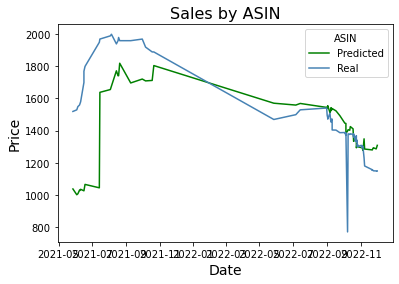

In [153]:
#plot individual lines with custom colors and labels
plt.plot(predict['Price'], label='Predicted', color='green')
plt.plot(real['Price'], label='Real', color='steelblue')


#add legend
plt.legend(title='ASIN')

#add axes labels and a title
plt.ylabel('Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.title('Sales by ASIN', fontsize=16)

#display plot
plt.show()